# Assignment 3 (K-Means Clustering & Random Forests) - (20 Pts)

In this homework, we will explore how the K-Nearest-Neighbour matching works and how one can use random forrest for image classification.

## Conda Setup

Generate the conda environment by running in the terminal:

`conda create --name gcv_exercise_3 python=3.8`

Run to activate environment:

`conda activate gcv_exercise_3`

Install all required packages for this exercise by running:

`conda install matplotlib numpy scikit-image scikit-learn`

Install Jupyter Notebook requirements:

`conda install -n gcv_exercise_3 ipykernel --update-deps --force-reinstall`

(Optional) If you are working on the TUWEL Juypter Notebooks:

`ipython kernel install --name "GCV_E_3" --user`

## Notebook Setup & Imports

In [18]:
# Setup

# The Random module implements pseudo-random number generators
import math
import random 

# Numpy is the main package for scientific computing with Python. 
# This will be one of our most used libraries in this class
import numpy as np
from math import log, e

# The Time library helps us time code runtimes
from time import time

# Import the Scikit-Image and -Learn library
from skimage import color, io, filters
from scipy import signal
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt

# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: K-Means Clustering (8 Pts)

As discussed in class, K-Means is one of the most popular clustering algorithms. We have provided skeleton code for K-Means clustering in the `kmeans()`-function. Your task is to finish the implementation. We also provide you with a blob-dataset, that contains 1000 objects for 5 classes.

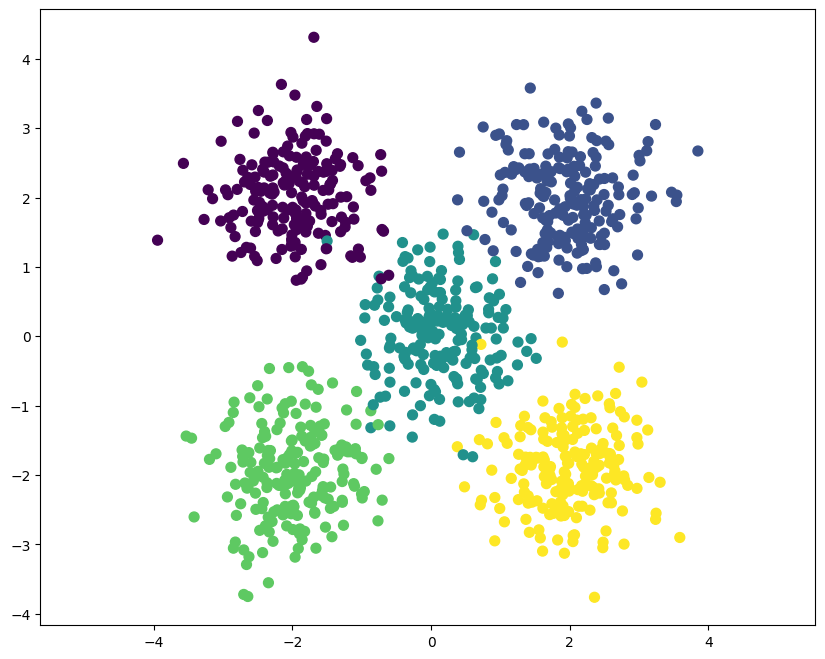

In [19]:
# Generate random data points for clustering
n_samples = 1000
centers = [[-2, 2], [2, 2], [0, 0], [-2, -2], [2, -2]]
std = 0.6

X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=std, random_state=42)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.axis('equal')
plt.show()

In [20]:
def kmeans(features, k, num_iters=100):
    """ Use kmeans algorithm to group features into k clusters.
    K-Means algorithm can be broken down into following steps:
        1. Randomly initialize cluster centers
        2. Assign each point to the closest center
        3. Compute new center of each cluster
        4. Stop if cluster assignments did not change
        5. Go to step 2
    Args:
        features - Array of N features vectors. Each row represents a feature
            vector.
        k - Number of clusters to form.
        num_iters - Maximum number of iterations the algorithm will run.
    Returns:
        assignments - Array representing cluster assignment of each point.
            (e.g. i-th point is assigned to cluster assignments[i])
    """

    N, D = features.shape

    assert N >= k, 'Number of clusters cannot be greater than number of points'

    # Randomly initalize cluster centers
    idxs = np.random.choice(N, size=k, replace=False)
    centers = features[idxs]
    assignments = np.zeros(N, dtype=np.uint32)
    for n in range(num_iters):
        # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
        # define the sum of all the points that will be closer to a certain center(will define this sum for Ox and Oy axis)
        # and after calculating it, we will divide by number of points, hence finding the center
        sum_x_new_center = np.zeros(k)
        sum_y_new_center = np.zeros(k)
        number_elements_new_center = np.zeros(k)

        # had to define the number of the point we are currently analysing
        number_of_point = 0
        for point in features:
            closest = -1

            # declare the distance that is going to be computed.
            # we are going to find out to which center one point is closest
            minimum_euclid_dist = 100.0
            x_minimum_dist = 100.0
            y_minimum_dist = 100.0

            # we will take each center and compute the euclidian distance from the given point
            for center in range(k):
                x_minimum_dist = point[0] - centers[center,0]
                y_minimum_dist = point[1] - centers[center,1]
                distance_from_center = math.sqrt(pow(x_minimum_dist, 2) + pow(y_minimum_dist, 2))

                # if we found a new lowest distance, we will update the closest (this variable represents the closest center)
                if minimum_euclid_dist > distance_from_center:
                    minimum_euclid_dist = distance_from_center
                    closest = center
            
            sum_x_new_center[closest] += point[0]
            sum_y_new_center[closest] += point[1]
            number_elements_new_center[closest] += 1

            # we have to do the assignments for each point to its closest center
            assignments[number_of_point] = closest
            number_of_point+=1
        # We will compare this old way that centers are positioned to the new one and see
        # if we have any differences
        old_centers = centers.copy()

        # the efective computation of the new centers
        for center in range(k):
            centers[center, 0] = sum_x_new_center[center] / number_elements_new_center[center]
            centers[center, 1] = sum_y_new_center[center] / number_elements_new_center[center]
        old_centers_new_centers = True
        for center in range(k):
            if old_centers[center,0] != centers[center,0]: old_centers_new_centers = False
            if old_centers[center,1] != centers[center,1]: old_centers_new_centers = False
        if old_centers_new_centers:
            break
    
        # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    return assignments

kmeans running time: 0.047328 seconds.


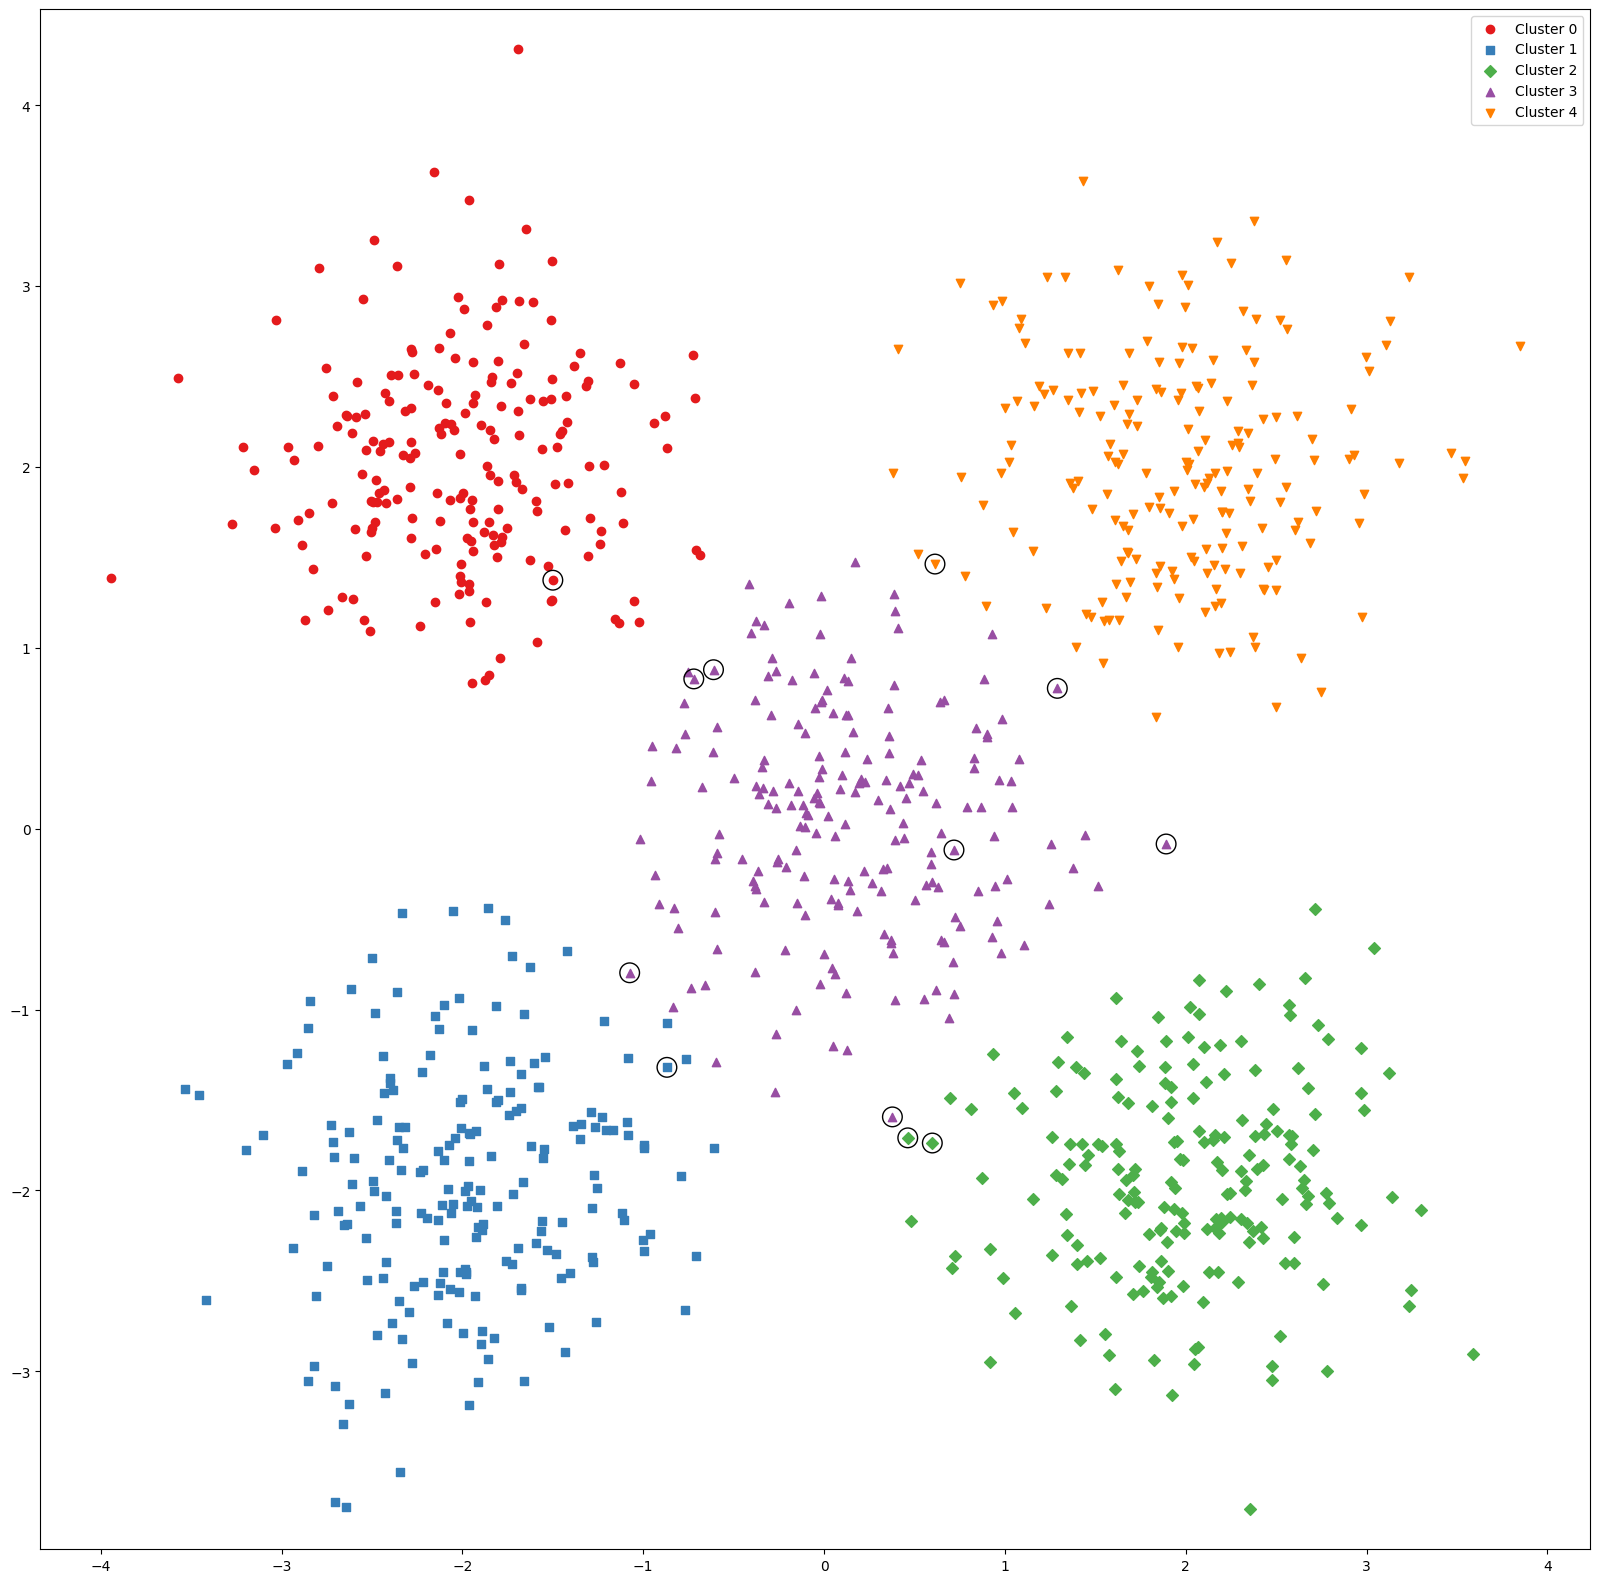

In [21]:
np.random.seed(0)
start = time()
y_pred = kmeans(X, 5)
end = time()

kmeans_runtime = end - start

print("kmeans running time: %f seconds." % kmeans_runtime)

# Define a color and shape palette for plotting
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
shapes = ['o', 's', 'D', '^', 'v']

fig, axs = plt.subplots(1, figsize=(20, 20))

y_pred_aligned = -np.ones_like(y_pred)
for i in range(5):

    # Weird conversion, due to different class labels in y_pred and y
    selected_objects = y_pred==i
    class_ = np.argmax(np.bincount(y[selected_objects]))
    y_pred_aligned[selected_objects] = class_

    cluster_i = X[selected_objects]
    axs.scatter(cluster_i[:, 0], cluster_i[:, 1], color=colors[i], marker=shapes[i], label=f'Cluster {i}')

    # Weird conversion, due to different class labels in y_pred and y
    missclassifications = np.invert(np.logical_and(y_pred==i, y==class_))
    class_missclassifications = np.logical_and(missclassifications, selected_objects)

    cluster_fp = X[class_missclassifications]
    axs.scatter(cluster_fp[:, 0], cluster_fp[:, 1], s=200, facecolors='none', edgecolors='black')

axs.legend()
axs.axis('equal')
plt.show()

## Part 2: Quantitative Evaluation (2 Pts)

Looking at points is a good way to get an idea for how well an algorithm is working, but the best way to evaluate an algorithm is to have some quantitative measure of its performance. In this task you will quantitatively analyse the predictions of the kmeans clustering. To do this we will first calculate the accuracy of the approach and the we will calculate the confusion matrix to see which class is most likely confused with which. 

<img src="imgs/example_confusion.png" alt="Confusion Matrix" width="800" />

Now implement the functions `compute_accuracy()` and `compute_confusion_matrix()`. For reference the example results are provided, yours should be close, but don't have to match exactly.

In [22]:
def compute_accuracy(y_true, y_pred):
    """ Compute the accuracy of the clustering.
    Args:
        y_true - The ground truth. A array of size n_samples 
            where y_true[x] corresponds to the correct class for x.
        y_pred - The prediction. A array of size n_samples 
            where y_pred[x] corresponds to the predicted class for x.
    Returns:
        accuracy - The fraction of samples where y_true and y_pred agree. A
            bigger number is better, where 1.0 indicates a perfect clustering.
    """

    accuracy = None
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    number_samples = y_true.size
    number_good_predictions = 0
    for i in range(number_samples):
        if(y_true[i] == y_pred[i]):
            number_good_predictions+=1
    accuracy = float(number_good_predictions) / float(number_samples)
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

    return accuracy

def compute_confusion_matrix(y_true, y_pred):
    """ Compute the confusion matrix for the clustering.
    Args:
        y_true - The ground truth. A array of size n_samples 
            where y_true[x] corresponds to the correct class for x.
        y_pred - The prediction. A array of size n_samples 
            where y_pred[x] corresponds to the predicted class for x.
    Returns:
        confusion_matrix - array-like of shape (n_classes, n_classes)
            The confusion matrix, where each element (i, j) represents the number of samples
            that belong to class i but were predicted as class j. n_classes == len(centers)
    Examples:
    ---------
    >>> y_true = [0, 1, 0, 1, 2, 2, 2]
    >>> y_pred = [0, 1, 1, 1, 2, 0, 2]
    >>> compute_confusion_matrix(y_true, y_pred)
    array([[1, 0, 0],
           [0, 1, 2],
           [1, 0, 1]])
    """

    confusion_matrix = None
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    confusion_matrix = np.zeros((len(centers),len(centers)))
    for i in range(y_true.size):
        confusion_matrix[y_true[i],y_pred[i]]+=1

    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

    return confusion_matrix

In [23]:
acc = compute_accuracy(y, y_pred_aligned)
cm = compute_confusion_matrix(y, y_pred_aligned)

print(acc)
print(cm)

# acc = 0.988
# confusion_matrix = [[198   0   2   0   0]
#                     [  0 199   1   0   0]
#                     [  1   1 195   1   2]
#                     [  0   0   1 199   0]
#                     [  0   0   3   0 197]]

0.988
[[198.   0.   2.   0.   0.]
 [  0. 199.   1.   0.   0.]
 [  1.   1. 195.   1.   2.]
 [  0.   0.   1. 199.   0.]
 [  0.   0.   3.   0. 197.]]


## Part 3: Descision Trees and Random Forests (10 Pts)

### Split the data into train and val

We need a training dataset to train the descision tree(s) on and a valdation dataset to evaluate on.

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Training Set size:", X_train.shape, y_train.shape)
print("Validation Set size:", X_val.shape, y_val.shape)

Training Set size: (700, 2) (700,)
Validation Set size: (300, 2) (300,)


### Descision Trees

Descision trees are a method used for classification and regression, but in this particular case I'll be focusing on classification. Decision trees are also non-parametric and require little to no parameter tuning. They differ from many common machine learning models used today that are typically optimized using gradient descent. Models like linear regression, support vector machines, neural networks, etc. require a lot of matrix based operations, while on the other hand tree based models like descision trees are constructed with just basic arithmetic. In other words, to build a tree all we're really doing is selecting a hand full of observations and features from our dataset and finding the value that makes the best split. We'll define what what it means to be the "best split" in a bit..

How does it work?: We start from very top, which is called the *root node* and ask a simple question. If the answer to the question is correct we'll move to the left node directly connected below, otherwise if wrong we'll move down to the right node. We'll repeat this process until we reach one of the bottom nodes, which are called the *terminal nodes*. For classification the terminal nodes output the class that is the mode while in the context of regression they'll output the mean prediction. The problem with this method of finding the best split point is that it is a rather greedy approach and is subject to high variance when trees aren't pruned. Pruning is essentially the process of trimming off nodes that output little predictive power to reduce overfitting, however, we skip trimming here, as random forests don't require pruning and account for overfitting through other techniques like bootstrapping and bagging which we'll soon cover.

### "The best split"

The most commonly used measurements for constructing binary decision trees are: Entropy, Classification Error, and Gini index. In this exercise we'll be focusing on **Gini index**, which is a measurement for the probability for a random instance being misclassified when chosen randomly. The lower the Gini Index the better, as the lower the likelihood of misclassification. If we define the elements of a node and their class as:

$$S = \{(x_1, y_1), ..., (x_n, y_n)\}$$

and elements of a node from a specific class k as:

$$S_k = \{(x,y) \in S | y = k\}$$

Then we can define the probability that and element of the node is from a speciifc class k as:

$$p_k= \frac{|S_k|}{|S|}$$

and the Gini impurity of the node as:

$$G(S) = \sum_{k=1}^K p_k(1-p_k)$$

The Gini Index has a minimum (highest level of purity) of 0 (at 0 and 1) and a maximum value of 0.5 (at 0.5). If Gini Index is 0.5, it indicates a random assignment of classes. An example for two classes is given:

<img src="imgs/gini_index.png" alt="Gini Index" width="800" />

Now implement the functions `gini_index()`, `_best_split()` and `_grow_tree()`. In `gini_index()` you should implement the Gini Index. In `_best_split()`you should iterate though the features and though the samples given and find the best index (to split the samples) and threshold (for the features). In `_grow_tree()` you should recursively build up the tree node by node until the maximum depth is reached. 

Your tree should be able to classify more than 60% of the samples correctly.

In [25]:
def gini_index(probs):
    """
    Compute the Gini index for a probability distribution.

    Parameters:
    -----------
    probs : list of float
        The probabilities of each label in the distribution.

    Returns:
    --------
    float
        The Gini index of the distribution.

    Examples:
    ---------
    >>> probs = [0.1, 0.2, 0.7]
    >>> gini_index(probs)
    0.42

    The Gini index is a measure of the inequality in a probability distribution, 
    with values ranging from 0 to 1. A Gini index of 0 means perfect equality, 
    while a Gini index of 1 means perfect inequality. The Gini index is commonly 
    used in decision trees as a criterion for selecting the best split.
    """

    gini = None
    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
    # for the gini inpurity we used the formula sum( prob_k * (1 - prob_k) )
    gini = 0
    for prob in probs:
        gini += prob*(1 - prob)
    
    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

    return gini

class Node:
    """
    A node in a decision tree.

    Attributes
    ----------
    feature : int
        Index of the feature used to make the split.
    threshold : float
        Threshold value used to make the split.
    left : Node
        The left child node.
    right : Node
        The right child node.
    value : float
        The predicted value of the node.

    Examples
    --------
    >>> node = Node(feature=0, threshold=0.5, left=Node(value=0.2), right=Node(value=0.8))
    >>> node.feature
    0
    >>> node.threshold
    0.5
    >>> node.left.value
    0.2
    >>> node.right.value
    0.8

    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        """
        Initialize a node in a decision tree.

        Parameters
        ----------
        feature : int, optional
            Index of the feature used to make the split.
        threshold : float, optional
            Threshold value used to make the split.
        left : Node, optional
            The left child node.
        right : Node, optional
            The right child node.
        value : float, optional
            The predicted value of the node.

        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    """
    A decision tree classifier.

    Parameters:
    max_depth -- The maximum depth of the tree. If None, the tree is grown until
                all leaves are pure or until all leaves contain less than 
                min_samples_split samples.

    Attributes:
    n_classes_ -- The number of classes.
    n_features_ -- The number of features.
    tree_ -- The root node of the decision tree.
    """
    def __init__(self, max_depth=None):
        """
        Initialize a DecisionTree object.

        Arguments:
        max_depth -- The maximum depth of the tree. If None, the tree is grown until
                    all leaves are pure or until all leaves contain less than 
                    min_samples_split samples.
        """
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Build a decision tree from the training set (X, y).

        Arguments:
        X -- The training input samples. A 2D numpy array of shape (n_samples, n_features).
        y -- The target values. A 1D numpy array of shape (n_samples,).
        """
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        """
        Predict class for X.

        Arguments:
        X -- The input samples to predict. A 2D numpy array of shape (n_samples, n_features).

        Returns:
        A list of predicted class labels for each input sample.
        """
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        """
        Find the best split for a node in the decision tree.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            The input samples for the node being split.
        y : array-like of shape (n_samples,)
            The target values for the node being split.

        Returns
        -------
        best_feature : int
            The index of the feature used to split the node.
        best_threshold : float
            The threshold value for the split.

        Examples
        --------
        >>> import numpy as np
        >>> X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
        >>> y = np.array([0, 1, 1, 0])
        >>> find_best_split(X, y)
        (1, 5.5)
        """
        m = y.size
        if m <= 1:
            return None, None

        occurances_per_class = np.bincount(y, minlength=self.n_classes_)
        best_gini = gini_index(occurances_per_class / m)
        best_idx, best_thr = None, None

        # Loop though features
        for idx in range(self.n_features_):
            # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
            # Filter all samples that have the same feature values for efficiency:
            # E.G: sample 1: [1,2,3,4] sample 2: [1,3,5,7] would result in [1,1] and thus we would test the same feature threshold twice.
            
            feature_values = np.unique(X[:, idx])

            # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

            # Loop though n_samples with unique features
            for i in range (1, len(feature_values)):

                # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
                # first sort the features values, to determine the middle
                feature_values_sorted = np.sort(feature_values)
                # calcualte the threshold
                threshold = (feature_values_sorted[i] - feature_values_sorted[i-1]) / 2
                
                # put each of the points in one of the 2 branches
                values_right = np.zeros(X.shape[0])
                values_left = np.zeros(X.shape[0])
                
                for j in range(X.shape[0]):
                    if X[j, idx] <= threshold:
                        values_right[j] = 1
                    else:
                        values_left[j] = 1
                
                # make them boolean
                values_left = values_left.astype(bool)
                values_right = values_right.astype(bool)

                # if one branch doesn't have any values, skip this iteration
                if values_left.size == 0 or values_right.size == 0:
                    continue
                
                # calculate the number of entries having a certain feature in one branch
                left_ocur = np.zeros(self.n_classes_)
                right_ocur = np.zeros(self.n_classes_)
                for j in range(values_right.size):
                    if values_right[j]:
                        right_ocur[ y[j] ] += 1
                    else:
                        left_ocur[ y[j] ] += 1
                
                # calculate the gini index values for the 2 branches
                gini_left = 0
                if np.sum(left_ocur) != 0:
                    gini_left = gini_index(left_ocur / np.sum(left_ocur))

                gini_right = 0
                if np.sum(right_ocur) != 0:
                    gini_right = gini_index(right_ocur / np.sum(right_ocur))

                # compute the final gini index value
                gini = (np.sum(left_ocur) / m) * gini_left + (np.sum(right_ocur) / m) * gini_right
                # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

                # if gini is lower with this split, save index and threshold
                if gini < best_gini:
                    # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
                    best_gini = gini
                    best_idx = idx
                    best_thr = threshold
                    # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****_thr = (feature_value[i] + feature_value[i - 1]) / 2

        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        """
        Recursively grow a decision tree from the input data.

        Arguments:
        X -- The input features, as a numpy array with shape (n_samples, n_features).
        y -- The target values, as a numpy array with shape (n_samples,).
        depth -- The current depth of the tree (default: 0).

        Returns:
        A Node object representing the root of the decision tree.
        """
        num_samples_per_class = np.bincount(y, minlength=self.n_classes_)
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(value=predicted_class)

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
                node.threshold = thr
                node.feature = idx

                depth += 1

                # we can create a matrix containing boolean values 
                # Each boolean value is for one of the values in the original matrix
                # denoting wether it is smaller than the threshold
                indices_for_one_side = X[:,idx] < thr

                # this sintax lets us take only the values on the positions
                # on which we have "true" in the inner matrix
                # also if we add "~", we inverse "true" with "false"
                X_left = X[indices_for_one_side]
                X_right = X[~indices_for_one_side]
                y_left = y[indices_for_one_side]
                y_right = y[~indices_for_one_side]

                # we build the tree recursivelly
                node.left = self._grow_tree(X_left, y_left, depth=depth)
                node.right = self._grow_tree(X_right, y_right, depth=depth)
                # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****

        return node

    def _predict(self, inputs):
        """
        Use the trained decision tree to predict the class labels for the input samples.

        Arguments:
        inputs -- The input features, as a numpy array with shape (n_samples, n_features).

        Returns:
        A list of predicted class labels for each input sample.
        """
        node = self.tree_
        while node.left:
            if inputs[node.feature] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value
    
tree = DecisionTree(max_depth=3)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
acc = sum(y_pred == y_val) / len(y_val)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.847


### Random Forrest

Random forests are essentially a collection of decision trees that are each fit on a subsample of the data. While an individual tree is typically noisy and subject to high variance, random forests average many different trees to reduce the variability and leave us with a powerful classifier. Now that we know how to build a single tree we can finally build our random forest which will just be a collection of these descision trees. When we call ```random_forest``` we'll need to specify n_estimators, max_features, max_depth, min_samples_split. 

#### Bootstrapping and Bagging

One of the main reasons random forests are a powerul machine learning model is the idea behind injecting randomness into each tree. Each individual decision tree will be constructed on a bootstrapped subset of our data. If our dataset has $n$ observations **bootstrapping** is the process of sampling $n$ points **with** replacement. We can actually calculate that the probability an observation is omitted from our bootstrapped dataset is  $(1 - \frac{1}{n})^{n}$. By definition $e^{-1} = \displaystyle \lim_{n\to\infty}(1-\frac{1}{n})^n$ and since $e^{-1}$ = 0.36787.. $\approx \frac{1}{3}$ $\Rightarrow$ bootstrapping $n$ samples with replacement will leave out approximately $\frac{1}{3}$ of the observations in each distinct tree. Since each individual tree is built using only $\frac{2}{3}$ of the data we'll  find that most trees will differ from one another.

The other great thing that comes with bootstrapping is that we get whats called an **Out of Bag Error estimate** for free. The OOB (out of bag) samples are the $\approx \frac{1}{3}$ observations that were not selected to build a parcticular tree. After we've built our tree with the *n* bootstrapped observations we can test each $\vec{x}_i$ that was left out and compute the mean prediction error for all the OOB samples, which we can record as the trees OOB score. Taking the mean of all the OOB scores give us our random forests OOB error, this is essentially **leave-one-out cross validation**.

Additionally, we can add further randomness to the data, by only looking at a **subset of features** $m$ where $m=\sqrt(p)$. This is injecting even more randomness into the model due to the fact that if we sampled all $p$ features in each tree we would likely be making splits at the same values from the same features in most trees. Given that we are only looking at $\sqrt(p)$ features at once many of the trees will be looking at a different groups of feature. With this we'll be able to produce many *uncorrelated* trees which will help us capture a lot of the variability as well as interactions between multiple variables.

Now implement the function `fit()`. In the `fit()` function you should generate `n_estimator` decision trees based on a subset of the dataset `X`, with a subset of the features (depending on `self.max_features`). If `self.max_features == None` all features are used, else `self.max_features` randomly sampled ones.

Your forest should be able to classify more than 80% of the samples correctly.

In [36]:
def to_categorical(y, num_classes=None):
    """
    Convert integer class labels to one-hot encoded vectors.

    Arguments:
    y -- 1D array of integer class labels
    num_classes -- number of possible classes

    Returns:
    A 2D NumPy array of one-hot encoded vectors.
    """

    if num_classes is None:
        num_classes = np.max(y) + 1

    one_hot = np.zeros((len(y), num_classes))
    one_hot[np.arange(len(y)), y] = 1

    return one_hot

class RandomForest:
    """
    Random forest classifier.

    Parameters:
    n_estimators -- number of decision trees in the forest
    max_depth -- maximum depth of the decision trees (default: None)
    max_features -- number of features to consider at each split (default: None)

    Attributes:
    n_classes_ -- number of classes in the training data
    n_features_ -- number of features in the training data
    trees -- list of decision trees in the forest
    """
    def __init__(self, n_estimators=100, max_depth=None, max_features=None):
        """
        Initialize the random forest classifier.

        Arguments:
        n_estimators -- number of decision trees in the forest
        max_depth -- maximum depth of the decision trees (default: None)
        max_features -- number of features to consider at each split (default: None)
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        """
        Build a random forest classifier from the training data.

        Arguments:
        X -- 2D NumPy array of shape (n_samples, n_features) containing the training data
        y -- 1D NumPy array of shape (n_samples,) containing the class labels
        """
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.trees = []
        for i in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth)
            # *****BEGINNING OF YOUR CODE (DO NOT DELETE THIS LINE)*****
            # The results can be random, as we only have 2 features, so our
            # model is going to select only one of them in approximatelly half 
            # the time, having bad results
            if self.max_features is not None:
                # we have to take at random a number of features 
                subset_indices = np.arange(0, X.shape[1])
                subset_x = np.random.choice(subset_indices, size=self.max_features, replace=False)
                alt_feature_X = X[:, subset_x]
                
            else:
                alt_feature_X = X


            # we have to take 2/3 out of all the indices (700)
            # and afterwards, we take the points(features) and
            # classes from those indices
            random_indices = np.random.choice(X.shape[0], size=int(X.shape[0]*2/3), replace=False)
            final_X = alt_feature_X[random_indices]
            final_y = y[random_indices]

            # fitting the current bootstrapped arrays
            tree.fit(final_X, final_y)
            
            # *****END OF YOUR CODE (DO NOT DELETE THIS LINE)*****
            self.trees.append(tree)

    def predict(self, X):
        """
        Predict class labels for new data using the trained random forest classifier.

        Arguments:
        X -- 2D NumPy array of shape (n_samples, n_features) containing the test data

        Returns:
        A 1D NumPy array of shape (n_samples,) containing the predicted class labels.
        """
        predictions = np.zeros((X.shape[0], self.n_classes_))
        for tree in self.trees:
            predictions += to_categorical(tree.predict(X), self.n_classes_)
        return np.argmax(predictions, axis=1)
    
forest = RandomForest(n_estimators=10, max_depth=3, max_features=None)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
acc = sum(y_pred == y_val) / len(y_val)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.847
